In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Initial Data Load:

In [25]:
df = pd.read_csv('to_model.csv', index_col = 0)

In [26]:
df.reset_index(drop = True, inplace = True)
df.head(5)


,Winner,R_fighter,Fighter,Height,Reach,Stance,Weight,age,loss,win,...,attendance,num_rounds,label,matches,matches.1,Reach_diff,Weight_diff,Height_diff,round_age,round_age.1
0,win,Charles Oliveira,Charles Oliveira,61.0,74.0,Orthodox,155.0,30.43,8.0,16.0,...,0.0,5,0,26.0,17.0,-3.0,-15.0,-8.0,30.0,28.0
1,win,Gilbert Burns,Gilbert Burns,61.0,71.0,Orthodox,170.0,33.67,3.0,10.0,...,0.0,3,0,14.0,32.0,-1.0,0.0,-12.0,34.0,42.0
2,win,Renato Moicano,Damir Hadzovic,69.0,70.0,Orthodox,155.0,33.62,3.0,3.0,...,0.0,3,1,7.0,9.0,-2.0,0.0,8.0,34.0,31.0
3,win,Nikita Krylov,Nikita Krylov,75.0,77.0,Orthodox,205.0,28.04,5.0,7.0,...,0.0,3,0,13.0,5.0,-5.0,0.0,-3.0,28.0,28.0
4,win,Francisco Trinaldo,Francisco Trinaldo,69.0,70.0,Southpaw,155.0,41.58,6.0,14.0,...,0.0,3,0,21.0,17.0,2.0,0.0,1.0,42.0,35.0


In [27]:
pd.set_option('display.max_rows', 100)
df.isna().any()

Winner                           False
R_fighter                        False
Fighter                          False
Height                           False
Reach                            False
Stance                           False
Weight                           False
age                              False
loss                             False
win                              False
draws                            False
streak                           False
cum_match_time                   False
avg_cum_KD                       False
avg_cum_Sub. att                 False
avg_cum_Pass                     False
avg_cum_Rev.                     False
avg_cum_Sig. str. Hits           False
avg_cum_Sig. str. Attempts       False
avg_cum_Total str. Hits          False
avg_cum_Total str. Attempts      False
avg_cum_Td Hits                  False
avg_cum_Td Attempts              False
avg_cum_Head Hits                False
avg_cum_Head Attempts            False
avg_cum_Body Hits        

In [29]:
df.columns

Index(['Winner', 'R_fighter', 'Fighter', 'Height', 'Reach', 'Stance', 'Weight',
       'age', 'loss', 'win', 'draws', 'streak', 'cum_match_time', 'avg_cum_KD',
       'avg_cum_Sub. att', 'avg_cum_Pass', 'avg_cum_Rev.',
       'avg_cum_Sig. str. Hits', 'avg_cum_Sig. str. Attempts',
       'avg_cum_Total str. Hits', 'avg_cum_Total str. Attempts',
       'avg_cum_Td Hits', 'avg_cum_Td Attempts', 'avg_cum_Head Hits',
       'avg_cum_Head Attempts', 'avg_cum_Body Hits', 'avg_cum_Body Attempts',
       'avg_cum_Leg Hits', 'avg_cum_Leg Attempts', 'avg_cum_Distance Hits',
       'avg_cum_Distance Attempts', 'avg_cum_Clinch Hits',
       'avg_cum_Clinch Attempts', 'avg_cum_Ground Hits',
       'avg_cum_Ground Attempts', 'eff_sig_str', 'eff_hits', 'eff_tds',
       'eff_head', 'eff_leg', 'eff_body', 'eff_distance', 'eff_clinch',
       'eff_ground', 'Fighter.1', 'Height.1', 'Reach.1', 'Stance.1',
       'Weight.1', 'age.1', 'loss.1', 'win.1', 'draws.1', 'streak.1',
       'cum_match_time.1', 'av

In [30]:
df.shape

(5445, 99)

# Prepare Data for Model

### Drop Irrelevant

In [31]:
drop_columns = ['Winner', 'R_fighter', 'Fighter', 'Fighter.1', 'location', 'round_age', 'round_age.1']
df.drop(drop_columns, axis = 1, inplace = True)

### One-hot-encode Categorical

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

In [33]:
mlb_weight = MultiLabelBinarizer()
mlb_weight.fit([df['WEIGHT_CLASS']])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [34]:
weight_classes = pd.DataFrame(mlb_weight.transform([[item] for item in df['WEIGHT_CLASS']]))
weight_classes.columns = mlb_weight.classes_
weight_classes

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Super Heavyweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5441,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5442,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5443,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
mlb_stance = MultiLabelBinarizer()
mlb_stance.fit([df['Stance.1']]) #Stance.1 includes all unique values of stance

MultiLabelBinarizer(classes=None, sparse_output=False)

In [36]:
stance = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance']]))
stance.columns = mlb_stance.classes_

stance1 = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance.1']]))
stance1.columns = ['{}.1'.format(item) for item in mlb_stance.classes_]

In [37]:
final_data = pd.concat([df, weight_classes, stance, stance1], axis = 1)

### Final Drop:

In [38]:
drop_columns = ['WEIGHT_CLASS', 'Stance', 'Stance.1']
final_data.drop(drop_columns, axis = 1, inplace = True)

# ML Models:

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [40]:
X = final_data.loc[:, ~final_data.columns.isin(['label'])]
y = final_data.loc[:, 'label']

print(X.shape, y.shape)

(5445, 113) (5445,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1000)

# Logistic Regression

In [42]:
log_params = [{'penalty': ['l1', 'l2'],
               'C': [.25, .5, .75, 1],
               'max_iter': [1000]}    
    ]

logGrid = GridSearchCV(LogisticRegression(), param_grid=log_params, verbose=1)

In [43]:
logGrid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'max_iter': [1000],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [44]:
logGrid.best_estimator_

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
logGrid.score(X_test, y_test)

0.6152433425160698

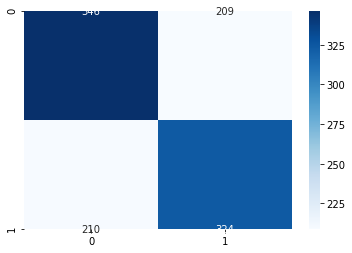

In [46]:
log_roc = roc_auc_score(y_test, logGrid.predict_proba(X_test)[:, 1])
log_cm = confusion_matrix(y_test, logGrid.predict(X_test))
sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues')

# Random Forest Classifier

In [47]:
rf_params = {
    'n_estimators': [100],
    'max_features': [20, 40, 60, 80, 100]
}

In [48]:
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, verbose=1)

In [49]:
rfGrid.fit(X_train, y_train)

C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [285]:
rfGrid.best_estimator_.feature_importances_

array([6.60244638e-03, 9.07078461e-03, 5.07738932e-03, 2.51067748e-02,
       5.60262896e-03, 7.27671916e-03, 1.33271925e-03, 8.24508702e-03,
       1.41382721e-02, 1.05287495e-02, 1.47409771e-02, 1.39069300e-02,
       7.37861024e-03, 1.54733547e-02, 8.32738204e-03, 1.73113246e-02,
       1.10091761e-02, 1.67235615e-02, 1.36894143e-02, 2.19850036e-02,
       1.04003989e-02, 1.05463204e-02, 1.11393591e-02, 9.70316788e-03,
       1.03041852e-02, 1.02062928e-02, 8.74229674e-03, 1.14437155e-02,
       1.00799990e-02, 1.67696982e-02, 1.68036498e-02, 9.35996786e-03,
       9.33096539e-03, 9.69117293e-03, 1.16992347e-02, 8.61544644e-03,
       9.48273762e-03, 1.15539775e-02, 9.18485399e-03, 9.83844299e-03,
       6.64925203e-03, 8.16938091e-03, 4.54856748e-03, 2.29927715e-02,
       5.72184022e-03, 5.58374763e-03, 1.22507776e-03, 8.27713451e-03,
       1.33103709e-02, 1.28480445e-02, 1.53029166e-02, 1.59906210e-02,
       7.61459660e-03, 1.40302159e-02, 8.81290984e-03, 1.64072471e-02,
      

In [286]:
feat_imps = {}
for i, imp in enumerate(rfGrid.best_estimator_.feature_importances_):
    feat_imps[X_train.columns[i]] = imp
    
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats



[('age', 0.025106774815634128),
 ('age.1', 0.022992771532704306),
 ('avg_cum_Head Hits', 0.021985003577824),
 ('avg_cum_Ground Hits.1', 0.02013104274485851),
 ('attendance', 0.017742161797048503),
 ('avg_cum_Total str. Hits', 0.01731132463858147),
 ('eff_ground.1', 0.01702901378440638),
 ('avg_cum_Ground Attempts', 0.01680364981607974),
 ('avg_cum_Ground Hits', 0.016769698161815002),
 ('avg_cum_Td Hits', 0.01672356147582243),
 ('avg_cum_Total str. Hits.1', 0.016407247140043144),
 ('avg_cum_Pass.1', 0.01599062098533917),
 ('avg_cum_Ground Attempts.1', 0.015831701564480646),
 ('avg_cum_Sig. str. Hits', 0.015473354650678705),
 ('avg_cum_Sub. att.1', 0.015302916560044786),
 ('avg_cum_Head Hits.1', 0.01496086967856342),
 ('avg_cum_Td Hits.1', 0.014827706063756005),
 ('avg_cum_Sub. att', 0.01474097708667889),
 ('eff_head.1', 0.014517856156492712),
 ('cum_match_time', 0.01413827212340206),
 ('avg_cum_Sig. str. Hits.1', 0.014030215907084087),
 ('avg_cum_Pass', 0.01390693001494505),
 ('matches'

In [279]:
rfGrid.best_estimator_.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=60, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rfGrid.score(X_test, y_test)

0.6492194674012856

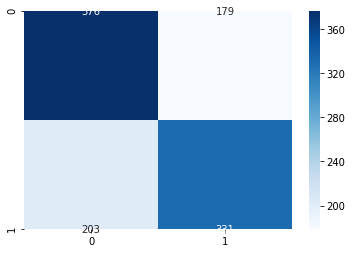

In [52]:
rf_roc = roc_auc_score(y_test, rfGrid.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rfGrid.predict(X_test))
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues')

# XGBoost

In [53]:
xgb_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [.01, .05, .1, .15, .2, .3]
    
}

In [54]:
xgbGrid = GridSearchCV(XGBClassifier(), param_grid=xgb_params)

In [55]:
xgbGrid.fit(X_train, y_train)

C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [56]:
xgbGrid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [57]:
xgbGrid.score(X_test, y_test)

0.6483011937557392

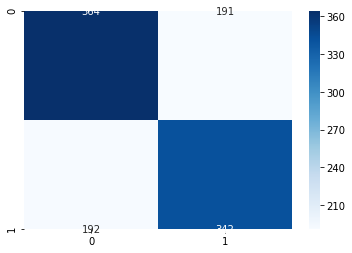

In [61]:
xgb_roc = roc_auc_score(y_test, xgbGrid.predict_proba(X_test)[:, 1])
xgb_cm = confusion_matrix(y_test, xgbGrid.predict(X_test))
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues')

ROC AUC LOG:  0.6798933765225901
ROC AUC RF:  0.7073809764821002
ROC AUC XGB:  0.7295070351250126


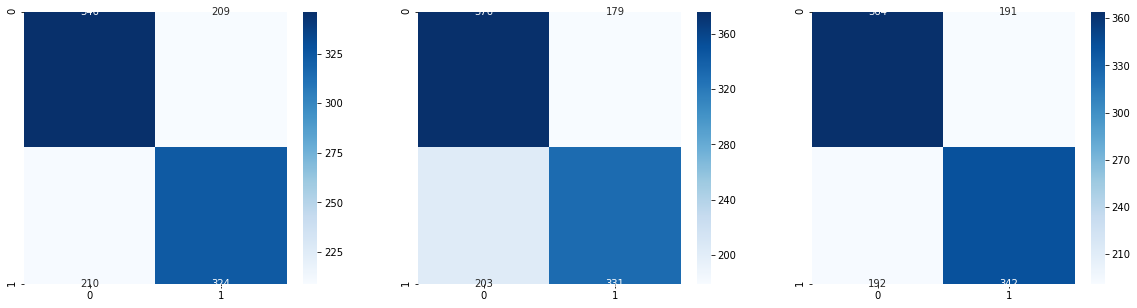

In [59]:
f, ax = plt.subplots(1, 3, figsize = [20, 5])

sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[1])
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[2]);

#Relatively similar performance

print('ROC AUC LOG: ', log_roc)
print('ROC AUC RF: ', rf_roc)
print('ROC AUC XGB: ', xgb_roc)

# Neural Network:

In [252]:
from tensorflow.keras.layers import Layer, Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

### Scaling the Data:

In [156]:
list(X.columns)

['Height',
 'Reach',
 'Weight',
 'age',
 'loss',
 'win',
 'draws',
 'streak',
 'cum_match_time',
 'avg_cum_KD',
 'avg_cum_Sub. att',
 'avg_cum_Pass',
 'avg_cum_Rev.',
 'avg_cum_Sig. str. Hits',
 'avg_cum_Sig. str. Attempts',
 'avg_cum_Total str. Hits',
 'avg_cum_Total str. Attempts',
 'avg_cum_Td Hits',
 'avg_cum_Td Attempts',
 'avg_cum_Head Hits',
 'avg_cum_Head Attempts',
 'avg_cum_Body Hits',
 'avg_cum_Body Attempts',
 'avg_cum_Leg Hits',
 'avg_cum_Leg Attempts',
 'avg_cum_Distance Hits',
 'avg_cum_Distance Attempts',
 'avg_cum_Clinch Hits',
 'avg_cum_Clinch Attempts',
 'avg_cum_Ground Hits',
 'avg_cum_Ground Attempts',
 'eff_sig_str',
 'eff_hits',
 'eff_tds',
 'eff_head',
 'eff_leg',
 'eff_body',
 'eff_distance',
 'eff_clinch',
 'eff_ground',
 'Height.1',
 'Reach.1',
 'Weight.1',
 'age.1',
 'loss.1',
 'win.1',
 'draws.1',
 'streak.1',
 'cum_match_time.1',
 'avg_cum_KD.1',
 'avg_cum_Sub. att.1',
 'avg_cum_Pass.1',
 'avg_cum_Rev..1',
 'avg_cum_Sig. str. Hits.1',
 'avg_cum_Sig. str. A

In [173]:
scale_columns = ['Height','Reach','Weight','age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'Height.1','Reach.1','Weight.1','age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','attendance','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

unscale_columns = [item for item in X.columns if item not in scale_columns]
unscale_columns

['title_bout',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

In [196]:
scaler = StandardScaler()
X_scale_train = pd.DataFrame(scaler.fit_transform(X_train[scale_columns]), index=X_train.index)
X_scale_train.columns = scale_columns

In [197]:
X_scale_train = pd.concat([X_scale_train, X_train[unscale_columns]], axis = 1)
X_scale_train

,Height,Reach,Weight,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
3478,0.636202,0.814117,0.368523,0.053115,-0.337948,-0.324047,3.151853,0.787473,0.126771,-0.203274,...,0,1,0,0,0,0,1,0,0,0
3320,0.831035,-0.131224,-0.041945,-0.588159,-0.337948,-0.588135,-0.274519,-0.747078,-0.381643,-0.203274,...,0,1,0,0,0,0,1,0,0,0
3581,0.051705,-0.603894,-0.452414,-0.504811,0.641168,-0.059959,-0.274519,-1.258595,0.347084,-0.046225,...,0,1,0,0,0,0,1,0,0,0
2645,-1.506955,-0.131224,-0.452414,-0.668106,-0.337948,-0.588135,-0.274519,-0.747078,-0.787019,0.424923,...,0,0,0,1,0,0,1,0,0,0
5144,0.051705,0.105111,-0.452414,-0.617076,-0.337948,-0.852223,-0.274519,-0.747078,-0.635850,-0.203274,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0.636202,0.105111,0.368523,0.068424,0.641168,0.204128,-0.274519,0.275956,0.270314,-0.092191,...,0,1,0,0,0,0,1,0,0,0
2398,0.636202,0.105111,-0.452414,0.053115,-0.337948,-0.852223,-0.274519,-0.747078,-0.635850,-0.203274,...,0,1,0,0,0,0,1,0,0,0
3776,1.220700,1.759458,0.368523,1.202988,2.109841,0.732304,-0.274519,0.275956,0.450462,-0.203274,...,0,1,0,0,0,0,1,0,0,0
4695,1.805198,1.523123,0.368523,-0.756558,-0.827506,-0.059959,-0.274519,1.298990,-0.404013,-0.203274,...,0,1,0,0,0,0,1,0,0,0


In [198]:
X_scale_test = pd.DataFrame(scaler.transform(X_test[scale_columns]), index=X_test.index)
X_scale_test.columns = scale_columns

X_scale_test = pd.concat([X_scale_test, X_test[unscale_columns]], axis = 1)
X_scale_test

,Height,Reach,Weight,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
3435,-1.506955,0.341447,-0.452414,-1.071242,0.151610,0.204128,3.151853,0.787473,-0.308431,-0.092191,...,0,1,0,0,0,0,1,0,0,0
420,0.051705,-1.076565,-0.999705,0.323574,0.151610,-0.324047,-0.274519,0.787473,0.126771,-0.203274,...,0,1,0,0,0,0,1,0,0,0
5306,-1.506955,0.169522,0.751627,-4.975024,-0.827506,-0.324047,-0.274519,0.787473,-0.853113,-0.203274,...,0,0,0,0,1,0,1,0,0,0
1866,1.415533,2.704799,0.915815,-0.079562,-0.337948,3.109094,-0.274519,5.902645,2.756969,-0.130495,...,0,1,0,0,0,0,0,0,1,0
4637,-0.337960,-0.603894,-0.452414,-0.549037,0.151610,-0.324047,-0.274519,0.275956,0.036952,-0.061547,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,-0.143128,-0.077566,-0.041945,-0.207137,-0.337948,-0.852223,-0.274519,-0.747078,-0.635850,-0.203274,...,0,1,0,0,0,0,0,0,1,0
1071,-0.143128,-0.840229,-0.726060,-0.913049,-0.337948,-0.852223,-0.274519,-0.747078,-0.696352,-0.203274,...,0,1,0,0,0,0,1,0,0,0
1525,0.051705,-0.131224,-0.041945,0.039508,0.151610,-0.059959,-0.274519,-0.747078,0.129144,-0.076869,...,0,1,0,0,0,0,1,0,0,0
653,-0.143128,-1.076565,-0.999705,0.867892,0.641168,0.732304,-0.274519,-0.747078,1.090725,-0.203274,...,0,1,0,0,0,0,1,0,0,0


In [222]:
class RocAucEval(Callback):
    def __init__(self, validation_data = (), interval = 5):
        
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0: #Test if interval has been met:
            y_pred = self.model.predict(self.X_val, verbose = 0)
            try:
                score = roc_auc_score(self.y_val, y_pred)
            except:
                score = 0
                pass
            print('\n ROC-AUC - epoch: {} score: {} \n'.format(epoch+1, score))


In [299]:
def get_model(dropout, n_size, input_size):
    model = Sequential()
    model.add(Dense(n_size, input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model


In [251]:
X_small_train, X_val, y_small_train, y_val = train_test_split(X_scale_train, y_train, test_size = .2, random_state = 1000)
roc_eval = RocAucEval((X_val, y_val), interval=5)


# GridSearch

In [253]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128]
}


In [254]:
mod = KerasClassifier(build_fn=get_model)
keras_grid = GridSearchCV(estimator=mod, param_grid=nn_params)

In [255]:
keras_grid.fit(X_scale_train, np.array(y_train), batch_size=32, epochs=20, callbacks=[roc_eval])

C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 2904 samples
Epoch 1/20
2368/2904 [=======================>......] - ETA: 0s - loss: 0.7576 - accuracy: 0.5144
 ROC-AUC - epoch: 1 score: 0.5915395138377354 

2904/2904 [==============================] - 0s 144us/sample - loss: 0.7472 - accuracy: 0.5176
Epoch 2/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6802 - accuracy: 0.5847
Epoch 3/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6562 - accuracy: 0.6047
Epoch 4/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6440 - accuracy: 0.6253
Epoch 5/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.6382 - accuracy: 0.6305
Epoch 6/20
2400/2904 [=======================>......] - ETA: 0s - loss: 0.6234 - accuracy: 0.6225
 ROC-AUC - epoch: 6 score: 0.6869935809744291 

2904/2904 [==============================] - 0s 56us/sample - loss: 0.6242 - accuracy: 0.6236
Epoch 7/20
2904/2904 [==============================] - 0s 45us/sample - loss

1452/1452 [==============================] - 0s 65us/sample - loss: 0.6358 - accuracy: 0.6481
Train on 2904 samples
Epoch 1/20
2368/2904 [=======================>......] - ETA: 0s - loss: 0.7335 - accuracy: 0.5296
 ROC-AUC - epoch: 1 score: 0.6636798905608755 

2904/2904 [==============================] - 0s 144us/sample - loss: 0.7264 - accuracy: 0.5368
Epoch 2/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6586 - accuracy: 0.6061
Epoch 3/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6415 - accuracy: 0.6267
Epoch 4/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6381 - accuracy: 0.6281
Epoch 5/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6288 - accuracy: 0.6333
Epoch 6/20
2464/2904 [========================>.....] - ETA: 0s - loss: 0.6242 - accuracy: 0.6412
 ROC-AUC - epoch: 6 score: 0.7254235504577502 

2904/2904 [==============================] - 0s 55us/sample - loss: 0.6224 - 

2904/2904 [==============================] - 0s 47us/sample - loss: 0.5694 - accuracy: 0.6952
Epoch 19/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5613 - accuracy: 0.7187
Epoch 20/20
1452/1452 [==============================] - 0s 66us/sample - loss: 0.6458 - accuracy: 0.6426
Train on 2904 samples
Epoch 1/20
2112/2904 [====================>.........] - ETA: 0s - loss: 0.7214 - accuracy: 0.5530
 ROC-AUC - epoch: 1 score: 0.6722403451541619 

2904/2904 [==============================] - 0s 168us/sample - loss: 0.7150 - accuracy: 0.5561
Epoch 2/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.6536 - accuracy: 0.6143
Epoch 3/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6369 - accuracy: 0.6302
Epoch 4/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.6216 - accuracy: 0.6467
Epoch 5/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.6095 - accuracy: 0.6711
Epoch 6/20


2904/2904 [==============================] - 0s 45us/sample - loss: 0.5365 - accuracy: 0.7290
Epoch 18/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.5269 - accuracy: 0.7383
Epoch 19/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.5265 - accuracy: 0.7266
Epoch 20/20
1452/1452 [==============================] - 0s 59us/sample - loss: 0.6593 - accuracy: 0.6329
Train on 2904 samples
Epoch 1/20
2048/2904 [====================>.........] - ETA: 0s - loss: 0.7174 - accuracy: 0.5474
 ROC-AUC - epoch: 1 score: 0.6708355256234872 

2904/2904 [==============================] - 0s 149us/sample - loss: 0.6999 - accuracy: 0.5678
Epoch 2/20
2904/2904 [==============================] - 0s 56us/sample - loss: 0.6426 - accuracy: 0.6247
Epoch 3/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.6222 - accuracy: 0.6384
Epoch 4/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.6077 - accuracy: 0.6574
Epoch 5/20


2904/2904 [==============================] - 0s 64us/sample - loss: 0.4856 - accuracy: 0.7679
Epoch 17/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.4697 - accuracy: 0.7855
Epoch 18/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.4714 - accuracy: 0.7769
Epoch 19/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.4576 - accuracy: 0.7917
Epoch 20/20
1452/1452 [==============================] - 0s 62us/sample - loss: 0.7142 - accuracy: 0.6129
Train on 2904 samples
Epoch 1/20
2400/2904 [=======================>......] - ETA: 0s - loss: 0.7468 - accuracy: 0.5508
 ROC-AUC - epoch: 1 score: 0.6269283384194464 

2904/2904 [==============================] - 0s 144us/sample - loss: 0.7533 - accuracy: 0.5444
Epoch 2/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6983 - accuracy: 0.5778
Epoch 3/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6809 - accuracy: 0.5857
Epoch 4/

2304/2904 [======================>.......] - ETA: 0s - loss: 0.6289 - accuracy: 0.6194
 ROC-AUC - epoch: 16 score: 0.7278201620540883 

2904/2904 [==============================] - 0s 59us/sample - loss: 0.6250 - accuracy: 0.6267
Epoch 17/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6255 - accuracy: 0.6436
Epoch 18/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.6186 - accuracy: 0.6470
Epoch 19/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6177 - accuracy: 0.6512
Epoch 20/20
1452/1452 [==============================] - 0s 60us/sample - loss: 0.6338 - accuracy: 0.6398
Train on 2904 samples
Epoch 1/20
2464/2904 [========================>.....] - ETA: 0s - loss: 0.8065 - accuracy: 0.5487
 ROC-AUC - epoch: 1 score: 0.6290908134273387 

2904/2904 [==============================] - 0s 141us/sample - loss: 0.7942 - accuracy: 0.5510
Epoch 2/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.70

2904/2904 [==============================] - 0s 50us/sample - loss: 0.6078 - accuracy: 0.6674
Epoch 15/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6051 - accuracy: 0.6577
Epoch 16/20
2240/2904 [======================>.......] - ETA: 0s - loss: 0.6031 - accuracy: 0.6652
 ROC-AUC - epoch: 16 score: 0.7669920025255184 

2904/2904 [==============================] - 0s 61us/sample - loss: 0.6053 - accuracy: 0.6612
Epoch 17/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5993 - accuracy: 0.6660
Epoch 18/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.5923 - accuracy: 0.6801
Epoch 19/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5966 - accuracy: 0.6767
Epoch 20/20
1452/1452 [==============================] - 0s 57us/sample - loss: 0.6312 - accuracy: 0.6371
Train on 2904 samples
Epoch 1/20
2176/2904 [=====================>........] - ETA: 0s - loss: 0.7682 - accuracy: 0.5561
 ROC-AUC - epo

2904/2904 [==============================] - 0s 41us/sample - loss: 0.5851 - accuracy: 0.6822
Epoch 14/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.5819 - accuracy: 0.6884
Epoch 15/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.5673 - accuracy: 0.6911
Epoch 16/20
2624/2904 [==========================>...] - ETA: 0s - loss: 0.5711 - accuracy: 0.6970
 ROC-AUC - epoch: 16 score: 0.7850520888140589 

2904/2904 [==============================] - 0s 55us/sample - loss: 0.5701 - accuracy: 0.6966
Epoch 17/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.5725 - accuracy: 0.6932
Epoch 18/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.5554 - accuracy: 0.7045
Epoch 19/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.5620 - accuracy: 0.7114
Epoch 20/20
1452/1452 [==============================] - 0s 103us/sample - loss: 0.6421 - accuracy: 0.6281
Train on 2904 samples
Epoch

2904/2904 [==============================] - 0s 44us/sample - loss: 0.5718 - accuracy: 0.6901
Epoch 13/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.5668 - accuracy: 0.6956
Epoch 14/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.5571 - accuracy: 0.7138
Epoch 15/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.5518 - accuracy: 0.7052
Epoch 16/20
2400/2904 [=======================>......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7229
 ROC-AUC - epoch: 16 score: 0.8028043775649795 

2904/2904 [==============================] - 0s 57us/sample - loss: 0.5411 - accuracy: 0.7269
Epoch 17/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.5340 - accuracy: 0.7228
Epoch 18/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.5323 - accuracy: 0.7324
Epoch 19/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.5187 - accuracy: 0.7421
Epoch 20/20
1452/1452 [=====

2272/2904 [======================>.......] - ETA: 0s - loss: 0.6590 - accuracy: 0.5902
 ROC-AUC - epoch: 6 score: 0.6898795117331369 

2904/2904 [==============================] - 0s 61us/sample - loss: 0.6624 - accuracy: 0.5826
Epoch 7/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6658 - accuracy: 0.5913
Epoch 8/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6594 - accuracy: 0.6057
Epoch 9/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6520 - accuracy: 0.6050
Epoch 10/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.6538 - accuracy: 0.5871
Epoch 11/20
2336/2904 [=======================>......] - ETA: 0s - loss: 0.6592 - accuracy: 0.5993
 ROC-AUC - epoch: 11 score: 0.7066400084183944 

2904/2904 [==============================] - 0s 59us/sample - loss: 0.6561 - accuracy: 0.6033
Epoch 12/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6489 - accuracy: 0.6061
Ep

2904/2904 [==============================] - 0s 41us/sample - loss: 0.6701 - accuracy: 0.5785
Epoch 6/20
1440/2904 [=============>................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6153
 ROC-AUC - epoch: 6 score: 0.699731663685152 

2904/2904 [==============================] - 0s 48us/sample - loss: 0.6500 - accuracy: 0.6129
Epoch 7/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6516 - accuracy: 0.6150
Epoch 8/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6484 - accuracy: 0.6085
Epoch 9/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6476 - accuracy: 0.6109
Epoch 10/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6440 - accuracy: 0.6157
Epoch 11/20
2688/2904 [==========================>...] - ETA: 0s - loss: 0.6389 - accuracy: 0.6146
 ROC-AUC - epoch: 11 score: 0.7234715353046406 

2904/2904 [==============================] - 0s 53us/sample - loss: 0.6373 - accuracy: 0.6143
Epoc

2904/2904 [==============================] - 0s 40us/sample - loss: 0.6712 - accuracy: 0.6006
Epoch 5/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6576 - accuracy: 0.6109
Epoch 6/20
2688/2904 [==========================>...] - ETA: 0s - loss: 0.6467 - accuracy: 0.6187
 ROC-AUC - epoch: 6 score: 0.7086446385351994 

2904/2904 [==============================] - 0s 51us/sample - loss: 0.6502 - accuracy: 0.6171
Epoch 7/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6476 - accuracy: 0.6243
Epoch 8/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6444 - accuracy: 0.6160
Epoch 9/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6354 - accuracy: 0.6264
Epoch 10/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6303 - accuracy: 0.6326
Epoch 11/20
2432/2904 [========================>.....] - ETA: 0s - loss: 0.6230 - accuracy: 0.6447
 ROC-AUC - epoch: 11 score: 0.73809323371

Epoch 3/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6808 - accuracy: 0.5885
Epoch 4/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6605 - accuracy: 0.6157
Epoch 5/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6429 - accuracy: 0.6274
Epoch 6/20
2400/2904 [=======================>......] - ETA: 0s - loss: 0.6374 - accuracy: 0.6300
 ROC-AUC - epoch: 6 score: 0.7250657687046196 

2904/2904 [==============================] - 0s 57us/sample - loss: 0.6379 - accuracy: 0.6295
Epoch 7/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6296 - accuracy: 0.6336
Epoch 8/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6231 - accuracy: 0.6408
Epoch 9/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6153 - accuracy: 0.6525
Epoch 10/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6113 - accuracy: 0.6567
Epoch 11/20
2496/2904 [=

Epoch 2/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.8637 - accuracy: 0.5203
Epoch 3/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.7959 - accuracy: 0.5413
Epoch 4/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.7405 - accuracy: 0.5427
Epoch 5/20
2904/2904 [==============================] - 0s 37us/sample - loss: 0.7371 - accuracy: 0.5399
Epoch 6/20
1440/2904 [=============>................] - ETA: 0s - loss: 0.7033 - accuracy: 0.5424
 ROC-AUC - epoch: 6 score: 0.6585078396295906 

2904/2904 [==============================] - 0s 47us/sample - loss: 0.7013 - accuracy: 0.5399
Epoch 7/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6887 - accuracy: 0.5537
Epoch 8/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6800 - accuracy: 0.5702
Epoch 9/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6907 - accuracy: 0.5637
Epoch 10/20
2904/2904 [==

Epoch 2/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.8685 - accuracy: 0.5300
Epoch 3/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.8015 - accuracy: 0.5386
Epoch 4/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.7310 - accuracy: 0.5589
Epoch 5/20
2904/2904 [==============================] - 0s 37us/sample - loss: 0.7176 - accuracy: 0.5565
Epoch 6/20
2816/2904 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.5643
 ROC-AUC - epoch: 6 score: 0.6695254130274648 

2904/2904 [==============================] - 0s 50us/sample - loss: 0.6900 - accuracy: 0.5630
Epoch 7/20
2904/2904 [==============================] - 0s 37us/sample - loss: 0.6865 - accuracy: 0.5744
Epoch 8/20
2904/2904 [==============================] - 0s 37us/sample - loss: 0.6748 - accuracy: 0.5782
Epoch 9/20
2904/2904 [==============================] - 0s 35us/sample - loss: 0.6753 - accuracy: 0.5754
Epoch 10/20
2904/2904 [==


2904/2904 [==============================] - 0s 155us/sample - loss: 0.9606 - accuracy: 0.5110
Epoch 2/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.8044 - accuracy: 0.5465
Epoch 3/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.7565 - accuracy: 0.5441
Epoch 4/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.7283 - accuracy: 0.5606
Epoch 5/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6928 - accuracy: 0.5785
Epoch 6/20
2720/2904 [===========================>..] - ETA: 0s - loss: 0.6752 - accuracy: 0.5934
 ROC-AUC - epoch: 6 score: 0.7023781963590445 

2904/2904 [==============================] - 0s 52us/sample - loss: 0.6743 - accuracy: 0.5947
Epoch 7/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6829 - accuracy: 0.5868
Epoch 8/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6637 - accuracy: 0.5892
Epoch 9/20
2904/2904 [============

1888/2904 [==================>...........] - ETA: 0s - loss: 0.9362 - accuracy: 0.5074
 ROC-AUC - epoch: 1 score: 0.6590918657266127 

2904/2904 [==============================] - 0s 159us/sample - loss: 0.8965 - accuracy: 0.5227
Epoch 2/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.7647 - accuracy: 0.5582
Epoch 3/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.7328 - accuracy: 0.5685
Epoch 4/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6941 - accuracy: 0.5782
Epoch 5/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6924 - accuracy: 0.5723
Epoch 6/20
2496/2904 [========================>.....] - ETA: 0s - loss: 0.6684 - accuracy: 0.6122
 ROC-AUC - epoch: 6 score: 0.7124802693886142 

2904/2904 [==============================] - 0s 55us/sample - loss: 0.6670 - accuracy: 0.6116
Epoch 7/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6547 - accuracy: 0.6102
Epoch

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000019B96A7D388>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [260]:
keras_grid.best_estimator_.get_params()

{'dropout': 0.6,
 'n_size': 32,
 'build_fn': <function __main__.get_model(dropout, n_size)>}

In [274]:
sum(y_test == (keras_grid.predict_proba(X_scale_test)[:, 1] > .5).flatten().astype(int)) / len(y_test)

0.6308539944903582

In [280]:
confusion_matrix(y_test, keras_grid.predict(X_scale_test))

array([[358, 197],
       [205, 329]], dtype=int64)

In [284]:
roc_auc_score(y_test, keras_grid.predict(X_scale_test).flatten())

0.6305749569794514

# Removing unscaled factors:

In [295]:
X_continuous_train = X_scale_train.loc[:, scale_columns]
X_continuous_test = X_scale_test.loc[:, scale_columns]

In [296]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_continuous_train.shape[1]]
}

In [297]:
mod = KerasClassifier(build_fn=get_model)
keras_grid_2 = GridSearchCV(estimator=mod, param_grid=nn_params)

In [300]:
keras_grid_2.fit(X_continuous_train, np.array(y_train), batch_size=32, epochs=20)

Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 137us/sample - loss: 0.7812 - accuracy: 0.5424
Epoch 2/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.7220 - accuracy: 0.5692
Epoch 3/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6868 - accuracy: 0.5944
Epoch 4/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6681 - accuracy: 0.5999
Epoch 5/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.6615 - accuracy: 0.6050
Epoch 6/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6493 - accuracy: 0.6123
Epoch 7/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6473 - accuracy: 0.6253
Epoch 8/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6402 - accuracy: 0.6274
Epoch 9/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6395 - accuracy: 0.6309
Epoch 10/20
2904/2904 [=========

2904/2904 [==============================] - 0s 42us/sample - loss: 0.5695 - accuracy: 0.7035
Epoch 16/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.5789 - accuracy: 0.6942
Epoch 17/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5770 - accuracy: 0.6966
Epoch 18/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.5656 - accuracy: 0.6987
Epoch 19/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.5712 - accuracy: 0.6952
Epoch 20/20
1452/1452 [==============================] - 0s 61us/sample - loss: 0.6604 - accuracy: 0.6061
Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 141us/sample - loss: 0.7551 - accuracy: 0.5451
Epoch 2/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.6833 - accuracy: 0.5902
Epoch 3/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6558 - accuracy: 0.5988
Epoch 4/20
2904/2904 [================

2904/2904 [==============================] - 0s 49us/sample - loss: 0.5914 - accuracy: 0.6780
Epoch 9/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.5773 - accuracy: 0.6746
Epoch 10/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.5733 - accuracy: 0.6890
Epoch 11/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.5699 - accuracy: 0.6963
Epoch 12/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.5625 - accuracy: 0.6942
Epoch 13/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5643 - accuracy: 0.7066
Epoch 14/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.5550 - accuracy: 0.7094
Epoch 15/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.5458 - accuracy: 0.7190
Epoch 16/20
2904/2904 [==============================] - 0s 52us/sample - loss: 0.5384 - accuracy: 0.7300
Epoch 17/20
2904/2904 [==============================] - 0s

2904/2904 [==============================] - 0s 146us/sample - loss: 0.7173 - accuracy: 0.5575
Epoch 2/20
2904/2904 [==============================] - 0s 56us/sample - loss: 0.6553 - accuracy: 0.6123
Epoch 3/20
2904/2904 [==============================] - 0s 55us/sample - loss: 0.6380 - accuracy: 0.6288
Epoch 4/20
2904/2904 [==============================] - 0s 52us/sample - loss: 0.6256 - accuracy: 0.6422
Epoch 5/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.6080 - accuracy: 0.6570
Epoch 6/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.5986 - accuracy: 0.6739
Epoch 7/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.5838 - accuracy: 0.6801
Epoch 8/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.5858 - accuracy: 0.6842
Epoch 9/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.5770 - accuracy: 0.6901
Epoch 10/20
2904/2904 [==============================] - 0s 50us/

2904/2904 [==============================] - 0s 56us/sample - loss: 0.6328 - accuracy: 0.6367
Epoch 16/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6308 - accuracy: 0.6360
Epoch 17/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.6303 - accuracy: 0.6398
Epoch 18/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6222 - accuracy: 0.6467
Epoch 19/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6237 - accuracy: 0.6550
Epoch 20/20
1452/1452 [==============================] - 0s 61us/sample - loss: 0.6347 - accuracy: 0.6357
Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 135us/sample - loss: 0.7814 - accuracy: 0.5541
Epoch 2/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.7298 - accuracy: 0.5733
Epoch 3/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.6890 - accuracy: 0.5885
Epoch 4/20
2904/2904 [================

2904/2904 [==============================] - 0s 49us/sample - loss: 0.6210 - accuracy: 0.6429
Epoch 9/20
2904/2904 [==============================] - 0s 53us/sample - loss: 0.6121 - accuracy: 0.6553
Epoch 10/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6106 - accuracy: 0.6488
Epoch 11/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.6062 - accuracy: 0.6546
Epoch 12/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.6029 - accuracy: 0.6739
Epoch 13/20
2904/2904 [==============================] - 0s 49us/sample - loss: 0.5943 - accuracy: 0.6698
Epoch 14/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.5892 - accuracy: 0.6811
Epoch 15/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.5939 - accuracy: 0.6739
Epoch 16/20
2904/2904 [==============================] - 0s 51us/sample - loss: 0.5890 - accuracy: 0.6784
Epoch 17/20
2904/2904 [==============================] - 0s

2904/2904 [==============================] - 0s 140us/sample - loss: 0.7249 - accuracy: 0.5596
Epoch 2/20
2904/2904 [==============================] - 0s 53us/sample - loss: 0.6603 - accuracy: 0.6136
Epoch 3/20
2904/2904 [==============================] - 0s 48us/sample - loss: 0.6435 - accuracy: 0.6229
Epoch 4/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6271 - accuracy: 0.6377
Epoch 5/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6104 - accuracy: 0.6522
Epoch 6/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6061 - accuracy: 0.6629
Epoch 7/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.5926 - accuracy: 0.6656
Epoch 8/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.5918 - accuracy: 0.6777
Epoch 9/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.5866 - accuracy: 0.6749
Epoch 10/20
2904/2904 [==============================] - 0s 46us/

2904/2904 [==============================] - 0s 39us/sample - loss: 0.6395 - accuracy: 0.6216
Epoch 16/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6344 - accuracy: 0.6357
Epoch 17/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6337 - accuracy: 0.6233
Epoch 18/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6241 - accuracy: 0.6450
Epoch 19/20
2904/2904 [==============================] - 0s 39us/sample - loss: 0.6230 - accuracy: 0.6371
Epoch 20/20
1452/1452 [==============================] - 0s 62us/sample - loss: 0.6593 - accuracy: 0.5771
Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 135us/sample - loss: 0.8525 - accuracy: 0.5165
Epoch 2/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.7719 - accuracy: 0.5389
Epoch 3/20
2904/2904 [==============================] - 0s 37us/sample - loss: 0.7248 - accuracy: 0.5572
Epoch 4/20
2904/2904 [================

2904/2904 [==============================] - 0s 46us/sample - loss: 0.6559 - accuracy: 0.6050
Epoch 9/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6526 - accuracy: 0.6216
Epoch 10/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6455 - accuracy: 0.6260
Epoch 11/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6502 - accuracy: 0.6081
Epoch 12/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6474 - accuracy: 0.6278
Epoch 13/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6372 - accuracy: 0.6219
Epoch 14/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6424 - accuracy: 0.6198s - loss: 0.6320 - accuracy: 0.
Epoch 15/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6437 - accuracy: 0.6212
Epoch 16/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6372 - accuracy: 0.6185
Epoch 17/20
2904/2904 [=====

2904/2904 [==============================] - 0s 142us/sample - loss: 0.7979 - accuracy: 0.5489
Epoch 2/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.7035 - accuracy: 0.5992
Epoch 3/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6798 - accuracy: 0.6002
Epoch 4/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6647 - accuracy: 0.6081
Epoch 5/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6535 - accuracy: 0.6281
Epoch 6/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6396 - accuracy: 0.6271
Epoch 7/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6338 - accuracy: 0.6346
Epoch 8/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6248 - accuracy: 0.6371
Epoch 9/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6105 - accuracy: 0.6598
Epoch 10/20
2904/2904 [==============================] - 0s 41us/

2904/2904 [==============================] - 0s 39us/sample - loss: 0.6638 - accuracy: 0.5809
Epoch 16/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.6553 - accuracy: 0.5861
Epoch 17/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.6509 - accuracy: 0.5940
Epoch 18/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6616 - accuracy: 0.5902
Epoch 19/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6556 - accuracy: 0.5854
Epoch 20/20
1452/1452 [==============================] - 0s 61us/sample - loss: 0.6517 - accuracy: 0.6088
Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 134us/sample - loss: 1.1120 - accuracy: 0.5141
Epoch 2/20
2904/2904 [==============================] - 0s 35us/sample - loss: 0.9492 - accuracy: 0.5121
Epoch 3/20
2904/2904 [==============================] - 0s 41us/sample - loss: 0.8591 - accuracy: 0.5213
Epoch 4/20
2904/2904 [================

2904/2904 [==============================] - 0s 35us/sample - loss: 0.6935 - accuracy: 0.5699
Epoch 8/20
2904/2904 [==============================] - 0s 35us/sample - loss: 0.6803 - accuracy: 0.5899
Epoch 9/20
2904/2904 [==============================] - 0s 38us/sample - loss: 0.6752 - accuracy: 0.5933
Epoch 10/20
2904/2904 [==============================] - 0s 36us/sample - loss: 0.6630 - accuracy: 0.5964
Epoch 11/20
2904/2904 [==============================] - 0s 42us/sample - loss: 0.6706 - accuracy: 0.5913
Epoch 12/20
2904/2904 [==============================] - 0s 36us/sample - loss: 0.6595 - accuracy: 0.5947
Epoch 13/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6543 - accuracy: 0.6102
Epoch 14/20
2904/2904 [==============================] - 0s 36us/sample - loss: 0.6575 - accuracy: 0.6050
Epoch 15/20
2904/2904 [==============================] - 0s 40us/sample - loss: 0.6462 - accuracy: 0.6102
Epoch 16/20
2904/2904 [==============================] - 0s 

1452/1452 [==============================] - 0s 86us/sample - loss: 0.6549 - accuracy: 0.5992
Train on 2904 samples
Epoch 1/20
2904/2904 [==============================] - 0s 163us/sample - loss: 1.0170 - accuracy: 0.5083
Epoch 2/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.8376 - accuracy: 0.5382
Epoch 3/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.7673 - accuracy: 0.5610
Epoch 4/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.7352 - accuracy: 0.5585
Epoch 5/20
2904/2904 [==============================] - 0s 44us/sample - loss: 0.6975 - accuracy: 0.5785
Epoch 6/20
2904/2904 [==============================] - 0s 43us/sample - loss: 0.7048 - accuracy: 0.5634
Epoch 7/20
2904/2904 [==============================] - 0s 47us/sample - loss: 0.6732 - accuracy: 0.5851
Epoch 8/20
2904/2904 [==============================] - 0s 50us/sample - loss: 0.6764 - accuracy: 0.5830
Epoch 9/20
2904/2904 [=====================

2904/2904 [==============================] - 0s 48us/sample - loss: 0.6431 - accuracy: 0.6243
Epoch 15/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6382 - accuracy: 0.6250
Epoch 16/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6423 - accuracy: 0.6136
Epoch 17/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6398 - accuracy: 0.6233
Epoch 18/20
2904/2904 [==============================] - 0s 46us/sample - loss: 0.6256 - accuracy: 0.6371
Epoch 19/20
2904/2904 [==============================] - 0s 45us/sample - loss: 0.6313 - accuracy: 0.6298
Epoch 20/20
1452/1452 [==============================] - 0s 61us/sample - loss: 0.6273 - accuracy: 0.6453
Train on 4356 samples
Epoch 1/20
4356/4356 [==============================] - 1s 269us/sample - loss: 0.8579 - accuracy: 0.5448
Epoch 2/20
4356/4356 [==============================] - 0s 56us/sample - loss: 0.7834 - accuracy: 0.5484
Epoch 3/20
4356/4356 [===============

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000019BA75B6348>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8], 'input_size': [87],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [302]:
keras_grid_2.best_estimator_.get_params()

{'dropout': 0.8,
 'input_size': 87,
 'n_size': 128,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [304]:
keras_grid_2.score(X_continuous_test, y_test)

1089/1089 [==============================] - 0s 84us/sample - loss: 0.6340 - accuracy: 0.6529


0.6528926

In [306]:
keras_2_cm = confusion_matrix(y_test, keras_grid_2.predict(X_continuous_test))
keras_2_cm

array([[384, 171],
       [207, 327]], dtype=int64)

In [307]:
X_test.shape

(1089, 113)